In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#from sqlalchemy import inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session (engine) 

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recentdt = session.query(func.max(Measurement.date)).first()
most_recentdt


('2017-08-23',)

<Axes: xlabel='date'>

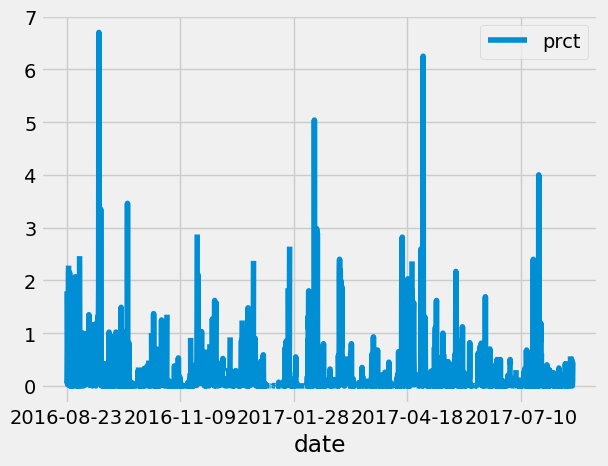

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
time_frame = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= one_year_ago).all() 

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prct_df = pd.DataFrame(time_frame, columns= ["date", "prct"])


# Sort the dataframe by date
prct1_df= prct_df.sort_values(by=['date'],ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prct1_df.plot (x="date", y="prct")



In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = prct1_df["prct"].describe()


print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prct, dtype: float64


# Exploratory Station Analysis

In [22]:
# first_row=session.query(Station).first()
# first_row.__dict__

In [23]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station= session.query(Measurement.station,func.count(Measurement.station)).group_by \
            (Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

Active_station_data = session.query( Measurement.station,
    func.min(Measurement.tobs).label('min_temperature'),
    func.max(Measurement.tobs).label('max_temperature'),
    func.avg(Measurement.tobs).label('avg_temperature')).filter(Measurement.station == active_station[0][0])\
.group_by(Measurement.station).all()

Active_station_data


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

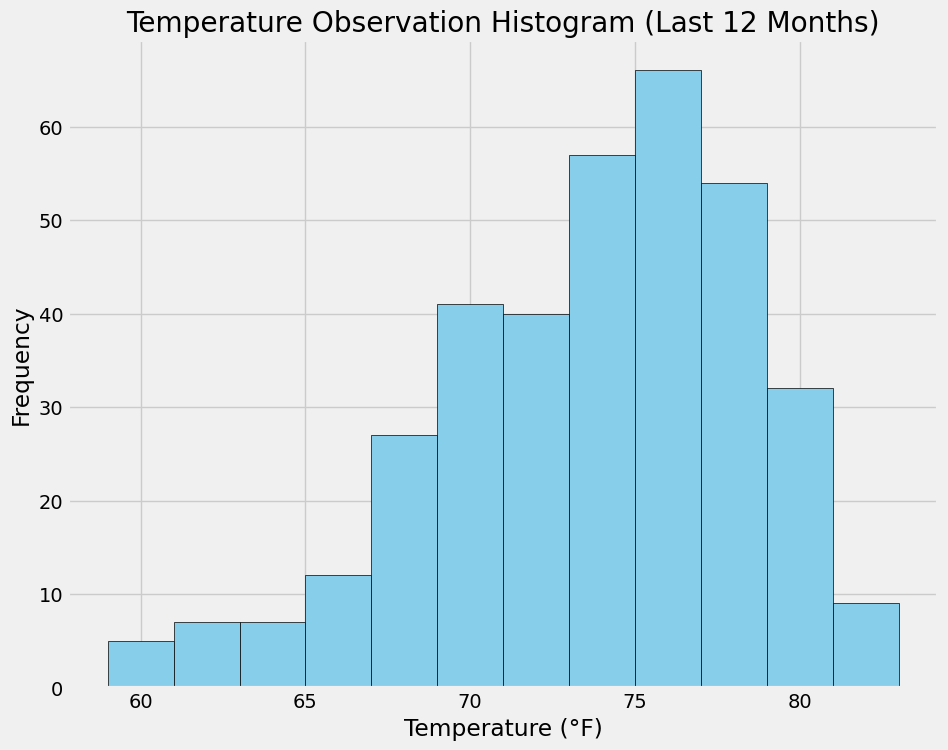

In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').scalar()
most_recent_date

# #calculate one year back 
one_year_bk = dt.date(2017,8,18) - dt. timedelta(days = 365)

#query temperature observation for last 12 months for USC00519281
temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_bk).all()


#Create DataFrame

temp_df = pd.DataFrame(temp_data, columns=['Date', 'Temperature'])
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
                                            
#plot Histogram
plt.figure(figsize=(10, 8))
plt.hist(temp_df['Temperature'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Histogram (Last 12 Months)')
plt.show()

# Close Session

In [26]:
# Close Session
session.close()
Base.metadata.drop_all(engine)